# HEART DISEASE ANALYSIS AND PREDICTION

Data set

## source

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv

This dataset contains 11 features that can be used to predict possible heart disease.


### IMPORT LIBRARIES

In [3671]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Read the csv file

In [3672]:

df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3673]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Exploratory Data Analysis

In [3674]:
# Get the shape of the data

df.shape

(918, 12)

In [3675]:
# view columns name
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [3676]:
# check/count for missing values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3678]:
# check for duplicates

df.duplicated().any()

False

In [3679]:
# Basic statistics

In [3680]:
# get analysis of the numerical data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Describe provides statistical information.

In [3681]:
# Correlation

In [3682]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [3683]:
# visualize the correlation

[Text(0.5, 1.0, 'CORRELATION PLOT \n')]

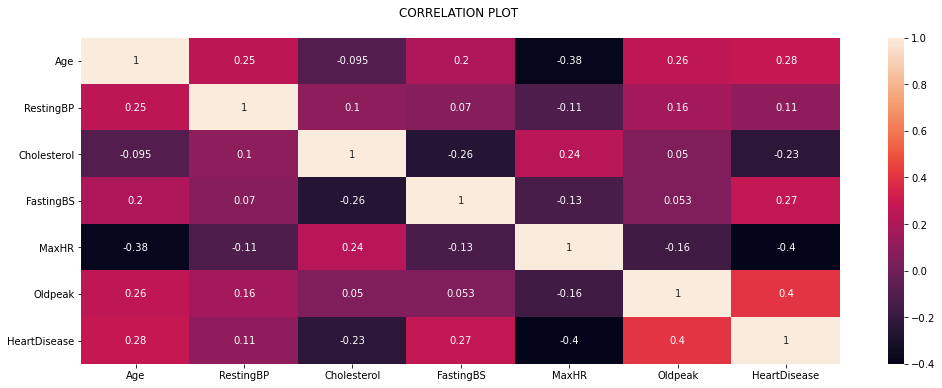

In [3684]:
# plotting correlation matrix for all numeric variables

plt.figure(figsize= (17,6))
sns.heatmap(df.corr(),  annot=True).set(title='CORRELATION PLOT \n')

#plt.show()

Scatterplot

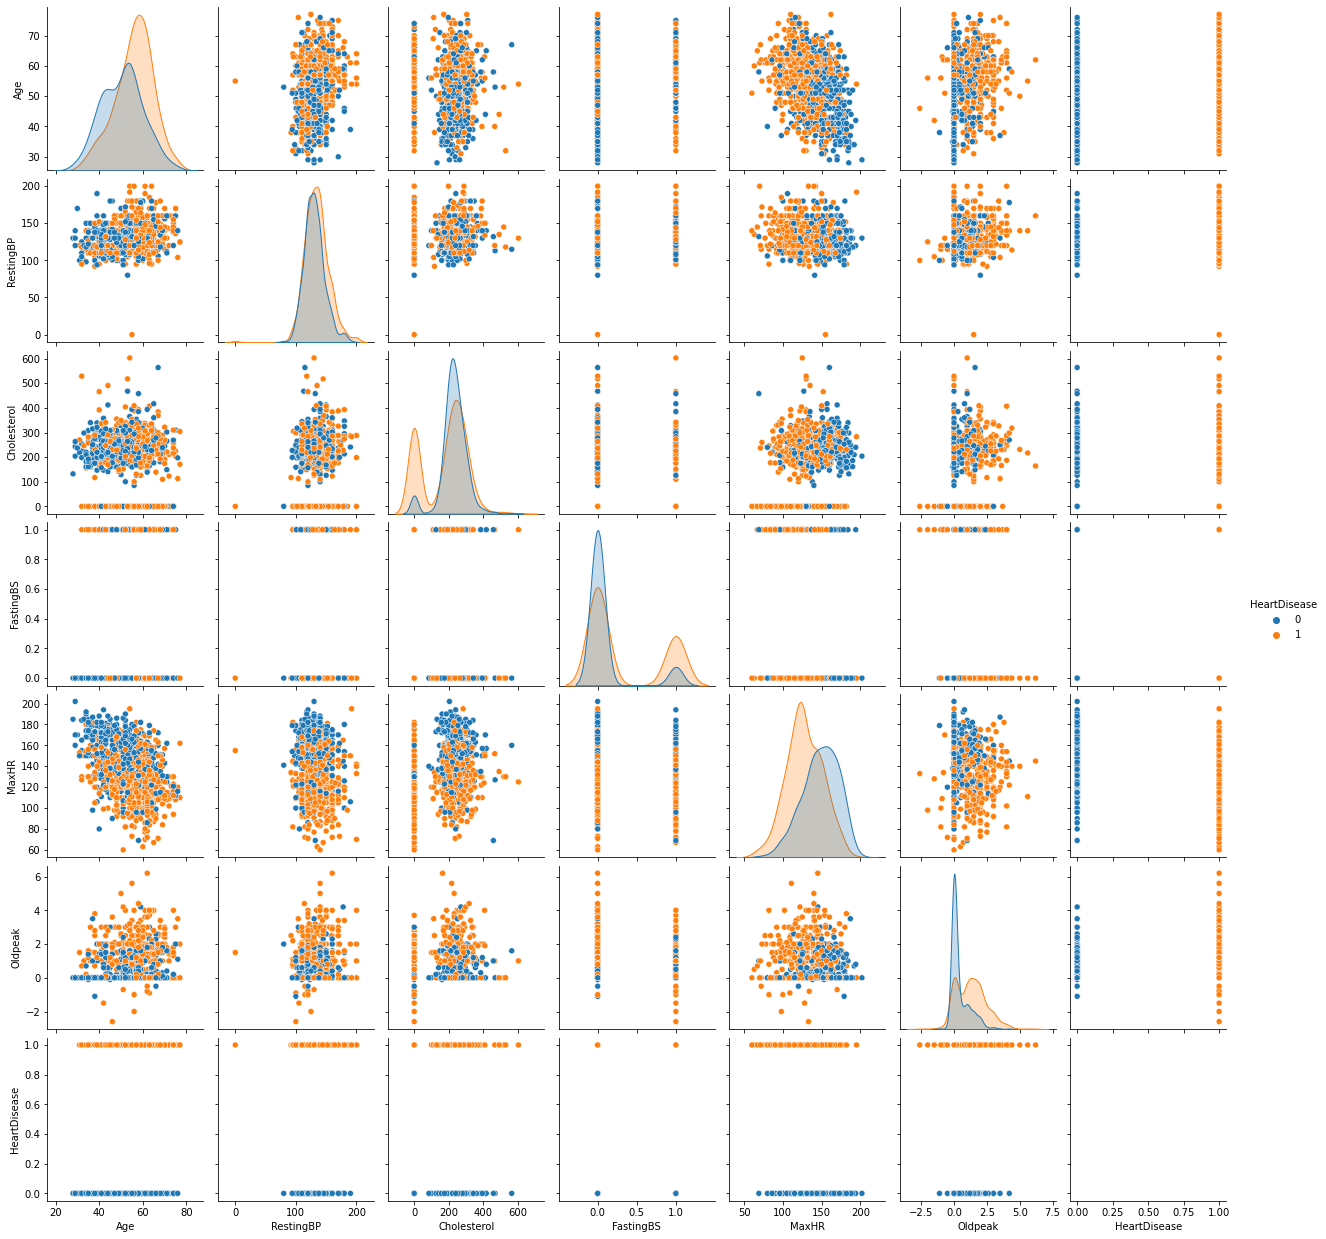

In [3685]:
# plot for all the numeric variables


sns.pairplot(df,hue="HeartDisease", vars= Numerical)

In general, there are weak positive/negative correlation between the variables.

In [3686]:
# Numerical and categorical

Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])

print(Categorical)
print(Numerical)

    Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130          283          0     98      0.0           

In [3687]:
# Get analysis of the categorical data

df.describe(include =[np.object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


From the plot, as age increases chances of heart disease increases.

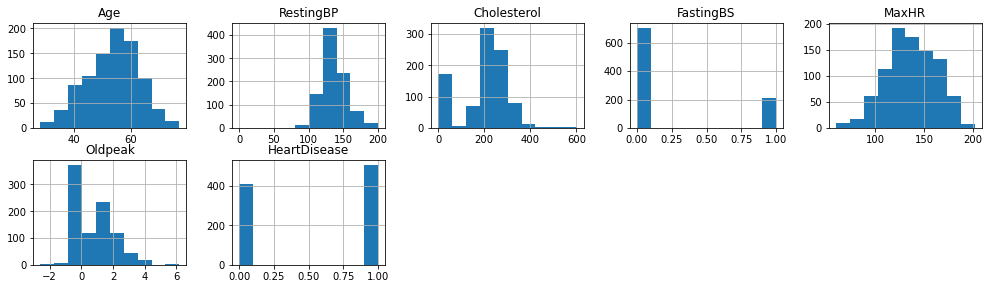

In [3688]:
# plot a histogram showing the distribution of the data

df.hist(figsize=(17,12),layout=(5,5));

Age                AxesSubplot(0.125,0.749828;0.133621x0.130172)
RestingBP       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Cholesterol      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
FastingBS       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
MaxHR           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Oldpeak            AxesSubplot(0.125,0.593621;0.133621x0.130172)
HeartDisease    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dtype: object

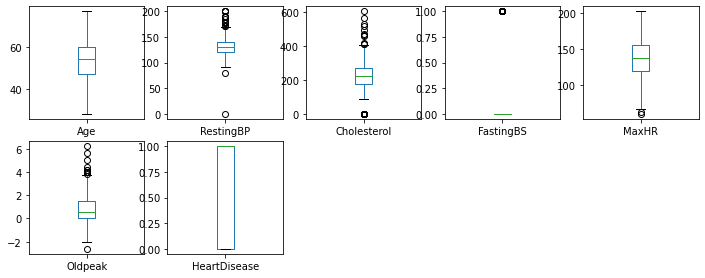

In [3689]:
# boxplots

df.plot(kind="box", subplots= True, layout= (5,5),figsize=(12,12))

The boxplot shows some outliers in the data.

### Get a count of the target(HeartDisease) column 

In [3690]:
# Get a count of the number of patients with heart disease and without.

df["HeartDisease"].value_counts()  

1    508
0    410
Name: HeartDisease, dtype: int64

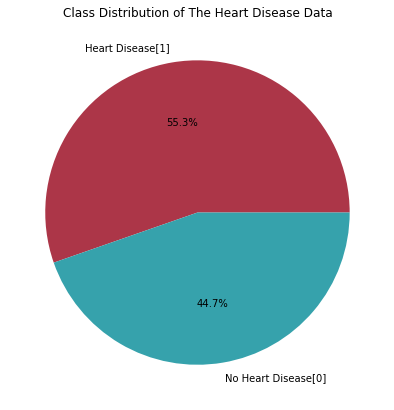

In [3691]:
# Class distribution plot for the count

plt.figure(figsize =(10, 7))
plt.pie(df["HeartDisease"].value_counts(), labels =["Heart Disease[1]","No Heart Disease[0]"],autopct= "%.1f%%",colors=["#ac3648","#36a2ac"])
plt.title("Class Distribution of The Heart Disease Data")
plt.show()

55.3% percert of the patients have heart disease and the other 44.7% does not have heart disease.

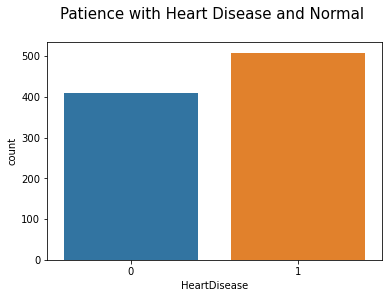

In [3692]:
# plot of heart disease vs normal(visualise count values)

sns.countplot(x = df["HeartDisease"])
plt.title("Patience with Heart Disease and Normal \n", fontsize = 15)
plt.show()

The number of patients with heart disease exceeds the number of patients without. There are more Patients with heart disease within the age of 55 to 77.

# Analysis Based on Age

In [3693]:
df["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [3694]:
df["Age"].min()

28

In [3695]:
df["Age"].max()

77

<AxesSubplot:xlabel='Age', ylabel='count'>

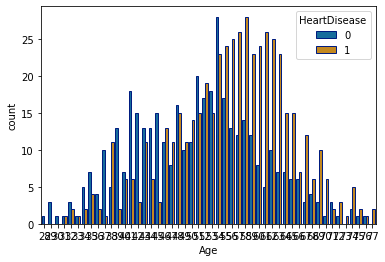

In [3696]:
#  plot by age to see the number with heart disease and without
  
sns.countplot(x = "Age", hue = "HeartDisease", data= df, palette = "colorblind",edgecolor = sns.color_palette("dark",n_colors=1))

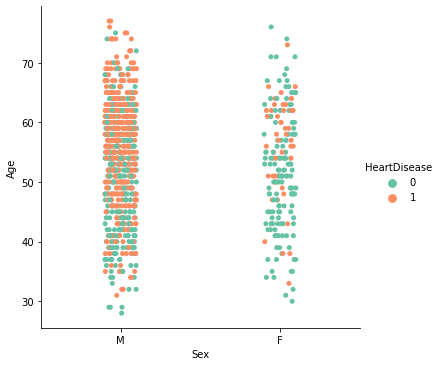

In [3697]:
# catplot showing sex and age

sns.catplot(data=df,x ="Sex",y ="Age",hue ="HeartDisease",palette="Set2")

More male have heart disease and it is seen more as the age advance, from 46 and above. Females too shows more cases of heart disease between 55 and 65.

## Analysis based on gender

In [3698]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [3699]:
# Get number of male and female

df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

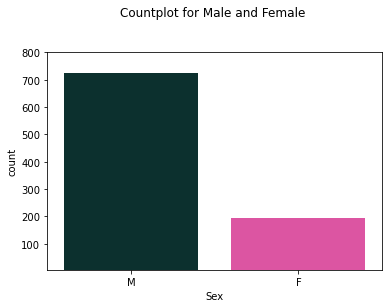

In [3700]:
# visualize the count

sns.countplot(x="Sex",data=df,palette=['#063633',"#f23fa5"])
plt.ylim(5, 800)
plt.title("Countplot for Male and Female \n\n")
plt.show()

There are more male in the dataset.

Text(0.5, 1.0, 'Countplot for Male and Female with and without Heart Disease \n\n')

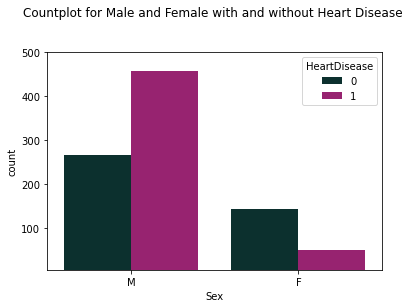

In [3701]:
#  plot by sex to see the number with heart disease and without
  
sns.countplot(x = "Sex", hue = "HeartDisease", data= df,palette=['#063633',"#ab0f77"])
plt.ylim(5, 500)
plt.title("Countplot for Male and Female with and without Heart Disease \n\n")

The number of male in the dataset is more than female,so might account for more male with heart disease.

HeartDisease    0    1
Sex                   
F             143   50
M             267  458


<AxesSubplot:xlabel='Sex'>

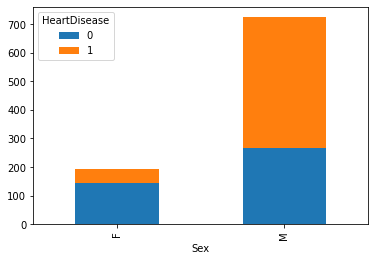

In [3702]:
# contingency_table showing number of normal and diseased with Gender. 

contingency_table = pd.crosstab(df["Sex"], df["HeartDisease"])
print(contingency_table)

contingency_table.plot(kind ="bar",stacked =True)

## Analyse based  on Chest pain type

In [3703]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [3704]:
# check the number of patients with type of chest pain 

df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

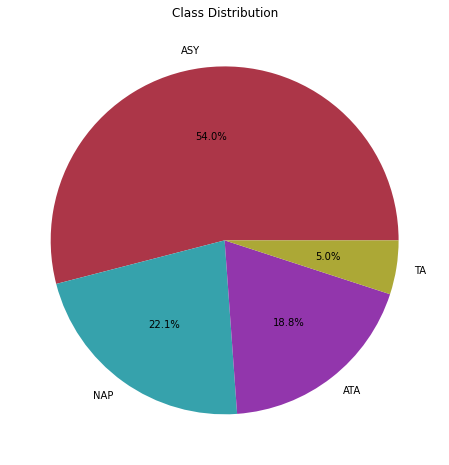

In [3705]:
# Class distribution plot for the count

plt.figure(figsize =(10, 8))
plt.pie(df["ChestPainType"].value_counts(), labels =["ASY","NAP","ATA","TA"],autopct= "%.1f%%",colors=["#ac3648","#36a2ac","#9236ac","#aca836"])
plt.title("Class Distribution")
plt.show()

54% of patients have ASY cheat pain,22.1% have NAP chest pain, 18.8% have ATA chest pain and 5% have TA chest pain.

Text(0.5, 1.0, 'Countplot for chest pain type with and without Heart Disease \n\n')

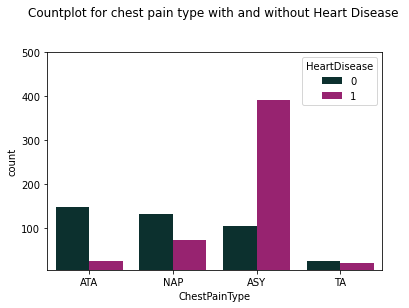

In [3706]:
# plot showing chest pain type with heart disease

sns.countplot(x = "ChestPainType", hue = "HeartDisease", data= df,palette=['#063633',"#ab0f77"])
plt.ylim(5, 500)
plt.title("Countplot for chest pain type with and without Heart Disease \n\n")

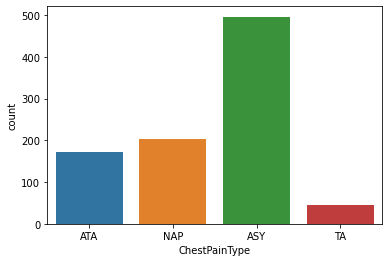

In [3707]:
# visualize the count

sns.countplot(x="ChestPainType",data=df)

plt.show()

Chest pain type ASY is more common in the patients, followed by NAP and ATA. Few patients have chest pain type TA.

HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


<AxesSubplot:xlabel='ChestPainType'>

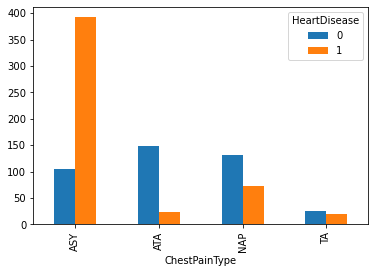

In [3708]:
# contingency_table showing number of normal and diseased with ChestPainType. 

contingency_table = pd.crosstab(df["ChestPainType"], df["HeartDisease"])
print(contingency_table)

contingency_table.plot(kind ="bar",stacked =False)

More patient with chest pain type ASY have heart disease compared to other chest pain type. 

## Analyse based  on RestingBP

In [3709]:
df["RestingBP"].min()

0

In [3710]:
df["RestingBP"].max()

200

<AxesSubplot:xlabel='Sex', ylabel='count'>

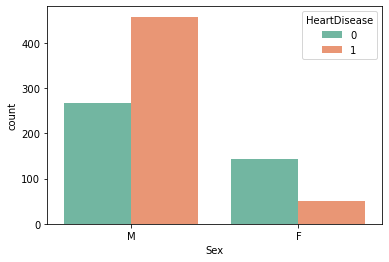

In [3711]:
sns.countplot(data=df,x ="Sex",hue ="HeartDisease",palette="Set2")

<AxesSubplot:xlabel='RestingBP', ylabel='Sex'>

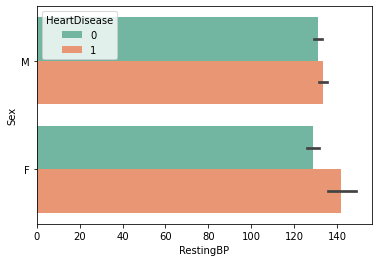

In [3712]:
sns.barplot(data=df,x ="RestingBP",y ="Sex",hue ="HeartDisease",palette="Set2")

There are more females with high resting bp associated with heart disease than male with slight differnce in male.


## Analyse based on Cholesterol

In [3713]:
df["Cholesterol"].min()

0

In [3714]:
df["Cholesterol"].max()

603

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

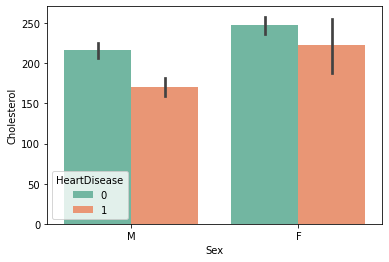

In [3715]:
# plot for cholesterol and sex

sns.barplot(data=df,x ="Sex",y ="Cholesterol",hue ="HeartDisease",palette="Set2")

More female have high cholesterol with heart disease than male.

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

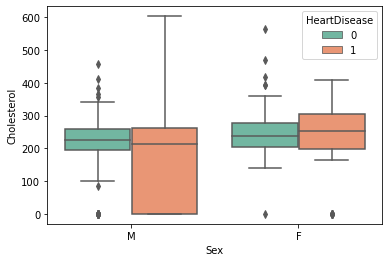

In [3716]:
# plot for cholesterol and sex

sns.boxplot(data=df,x ="Sex",y ="Cholesterol",hue ="HeartDisease",palette="Set2")

Outliers in male and female with no heart disease shows that there are younger and older patients without heart disease. 

## Analyse based  on RestingECG

In [3717]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [3718]:
# count

df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

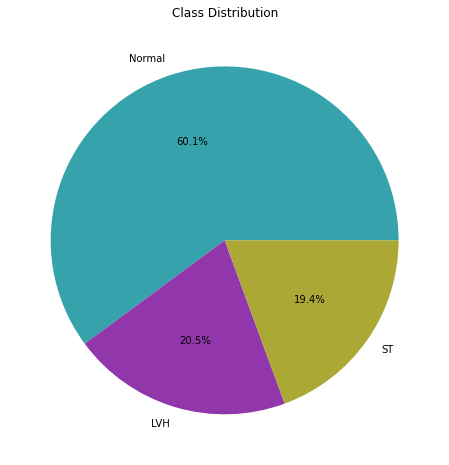

In [3719]:
# Class distribution plot for the count

plt.figure(figsize =(10, 8))
plt.pie(df["RestingECG"].value_counts(), labels =["Normal","LVH","ST"],autopct= "%.1f%%",colors=["#36a2ac","#9236ac","#aca836"])
plt.title("Class Distribution")
plt.show()

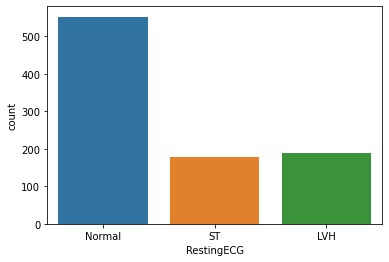

In [3720]:
sns.countplot(x="RestingECG",data=df)

plt.show()

In [3721]:
# contingency_table showing number of normal and diseased with RestingECG. 


contingency_table = pd.crosstab(df["RestingECG"], df["HeartDisease"])
contingency_table

HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


<AxesSubplot:xlabel='RestingECG'>

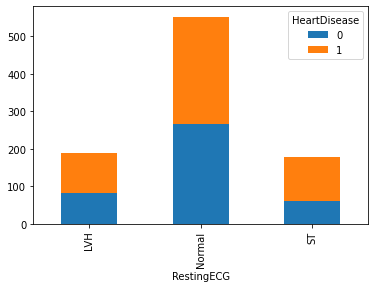

In [3722]:
contingency_table.plot(kind ="bar",stacked =True)

## Analyse based  on FastingBS

In [3723]:
df["FastingBS"].unique()

array([0, 1], dtype=int64)

In [3724]:
df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

HeartDisease    0    1
FastingBS             
0             366  338
1              44  170


<AxesSubplot:xlabel='FastingBS'>

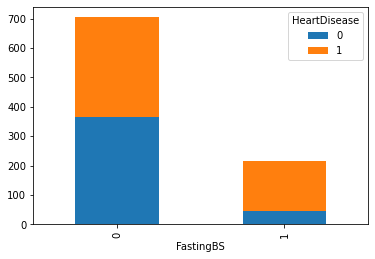

In [3725]:
# contingency_table showing number of normal and diseased with FastingBS. 

contingency_table = pd.crosstab(df["FastingBS"], df["HeartDisease"])
print(contingency_table)

contingency_table.plot(kind ="bar",stacked =True)

## Analyse based  on ExerciseAngina

In [3726]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [3727]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

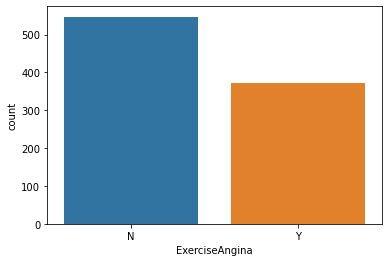

In [3728]:
sns.countplot(x="ExerciseAngina",data=df)

plt.show()

HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316


<AxesSubplot:xlabel='ExerciseAngina'>

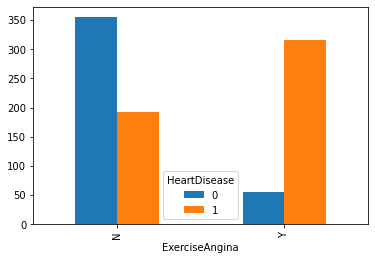

In [3729]:
# contingency_table showing number of normal and diseased with ExerciseAngina. 

contingency_table = pd.crosstab(df["ExerciseAngina"], df["HeartDisease"])
print(contingency_table)

contingency_table.plot(kind ="bar",stacked =False)

More patients have chest pain after exercise and many of them have heart disease.

# Analyse based  on ST_Slope

In [3730]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [3731]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

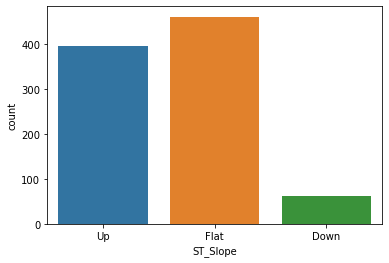

In [3732]:
sns.countplot(x="ST_Slope",data=df)

plt.show()

HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78


<AxesSubplot:xlabel='ST_Slope'>

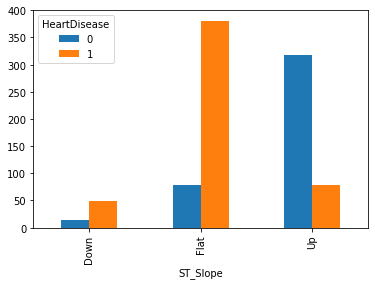

In [3733]:
# contingency_table showing number of normal and diseased with ST_Slope. 

contingency_table = pd.crosstab(df["ST_Slope"], df["HeartDisease"])
print(contingency_table)

contingency_table.plot(kind ="bar",stacked =False)

Upsloping after exercise is normal. Patients with flat or down slope are likely to have heart disease.


Scatterplot

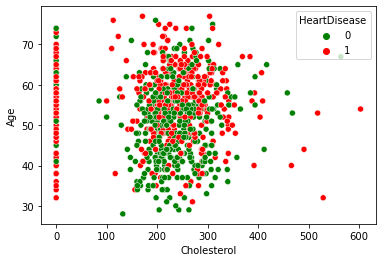

In [3734]:
# for cholesterol and age 

hue_colors = {1: "r",0: "g"}

sns.scatterplot(x="Cholesterol",y="Age",data=df,hue="HeartDisease",palette=hue_colors)

plt.show()

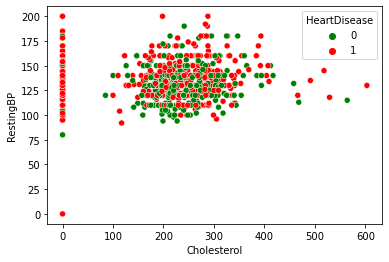

In [3735]:
# for resting BP and cholesterol

hue_colors = {1: "r",0: "g"}

sns.scatterplot(x="Cholesterol",y="RestingBP",data=df,hue="HeartDisease",palette=hue_colors)

plt.show()

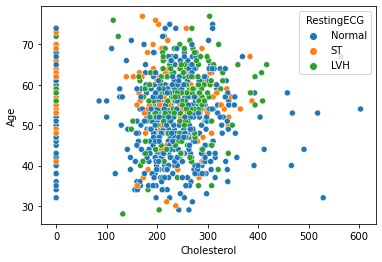

In [3736]:
# for cholesterol and age using resting ecd as hue

sns.scatterplot(x="Cholesterol",y="Age",data=df,hue="RestingECG")

plt.show()

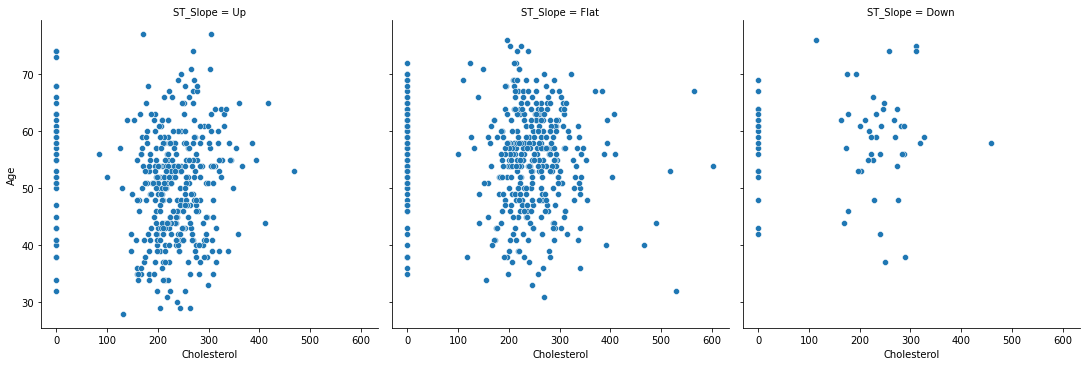

In [3737]:
# using replot

sns.relplot(x="Cholesterol",y="Age",data=df,kind="scatter",col="ST_Slope")

plt.show()

From the boxplots and scatterplots above, there are so many low and high outliers. The low outliers mostly zeros could be as a result of no record.
Use z_score to to detect and remove the outliers.

## Data Cleaning

There are rows with cholesterol value 0 which could be error of non-computed values.

In [3738]:
# values with 0

df_0 = df[df["Cholesterol"] == 0]
df_0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [3739]:
# Most of the data with zero value for cholesterol have heart disease value as 1. 
# This could mean that they have cholesterol values above 240mm/Hg, 
# which is the measure for high cholesterol that could cause heart disease.

# Replace zero with value above 240.

df["Cholesterol"] = df["Cholesterol"].replace(0,241)    

In [3740]:
df[df["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [3741]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Detecting and Removing Outliers

In [3742]:
# create a subset for the numeric variable with possible outliers. 
df_numeric= df[['Age', 'RestingBP', 'Cholesterol','MaxHR']]
df_numeric               

,Age,RestingBP,Cholesterol,MaxHR
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
913,45,110,264,132
914,68,144,193,141
915,57,130,131,115
916,57,130,236,174


In [3743]:
# determine the z_score

z=np.abs(stats.zscore(df_numeric))
print(z)

[[1.4331398  0.41090889 0.84501147 1.38292822]
 [0.47848359 1.49175234 1.19971521 0.75415714]
 [1.75135854 0.12951283 0.73245771 1.52513802]
 ...
 [0.37009972 0.12951283 2.11890427 0.85706875]
 [0.37009972 0.12951283 0.14921343 1.4615246 ]
 [1.64528563 0.30282455 1.29351001 1.42222641]]


In [3744]:
# Define threshold for filtering outliers and detecting outliers

threshold = 3

print(np.where(z>3))

(array([ 28,  30,  69,  76, 103, 109, 149, 182, 241, 250, 365, 390, 399,
       449, 496, 592, 616, 624, 667, 732, 759, 796], dtype=int64), array([2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2],
      dtype=int64))


There are 12 outliers detected. The first array gives the position on the row while the second gives the position on the column.

In [3745]:
# filtering outliers

df = df[(z<3).all(axis=1)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3746]:
df.shape

(896, 12)

## STATISTICAL TEST

## Chi square test of independence

To check if there is a relationship between high cholesterol level and heart disease. 

Null Hypothesis;  high cholesterol does not cause heart disease.

Alternative Hypothesis; high cholesterol causes heart disease.

In [3747]:
# Filter out columns of our interest

df_1 = df.loc[:, ['Cholesterol', 'HeartDisease']]

df_1

,Cholesterol,HeartDisease
0,289,0
1,180,1
2,283,0
3,214,1
4,195,0
...,...,...
913,264,1
914,193,1
915,131,1
916,236,1


I categorized the cholesterol into high level, > 240mm/Hg  as 1 and low level <= 240mm/Hg as 0.

In [3748]:
df_1.loc[df_1.Cholesterol <= 240, 'Cholesterol'] = 0
df_1.loc[df_1.Cholesterol > 240, 'Cholesterol'] = 1

In [3749]:
contingency_table = pd.crosstab(df_1["Cholesterol"], df_1["HeartDisease"])
print(contingency_table)


HeartDisease    0    1
Cholesterol           
0             226  164
1             178  328


In [3750]:
observed_values = contingency_table.values
observed_values

array([[226, 164],
       [178, 328]], dtype=int64)

In [3751]:
no_of_rows = contingency_table.shape[0]
no_of_coloumns = contingency_table.shape[1]
dof = (no_of_rows-1)* (no_of_coloumns-1)
print("Degree of Freedom:", dof)

Degree of Freedom: 1


In [3752]:
chi2stat,pval, dof, expected = stats.chi2_contingency(contingency_table)
print("chi2 stat", chi2stat)
print("p-value",pval)
print("Degree of Freedom:", dof)
print("Expected Values: \n",expected)

chi2 stat 45.209757970658
p-value 1.770208618261378e-11
Degree of Freedom: 1
Expected Values: 
 [[175.84821429 214.15178571]
 [228.15178571 277.84821429]]


In [3753]:
alpha = 0.05

if pval <= alpha:
    print("We reject the null hypothesis HO, (categories are dependent.)")
else:
    print("We fail to reject the null hypothesis HO, (categories are independent.)")

We reject the null hypothesis HO, (categories are dependent.)


We reject the null hypothesis that cholesterol does not cause heart disease.
There is a relationship between the level of cholesterol and heart disease. High cholesterol could result to heart disease.

# T-test test of  independence

Perform a t-test to examine the hypothesis that says: the average cholesterol is different for heart disease patients from patients without heart disease.

In [3754]:
# without heart disease

df0 = df[df["HeartDisease"] == 0]
df0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


In [3755]:
# with heart disease

df1 = df[df["HeartDisease"] == 1]
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


H0: μA = μB
Ha: μA != μB

In [3756]:
'''A = df[df['HeartDisease']==0]['Cholesterol']
B = df[df['HeartDisease']==1]['Cholesterol']

alpha=0.01

tstat, pval = stats.ttest_ind(a=A, b=B, alternative = 'two-sided')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")'''

'A = df[df[\'HeartDisease\']==0][\'Cholesterol\']\nB = df[df[\'HeartDisease\']==1][\'Cholesterol\']\n\nalpha=0.01\n\ntstat, pval = stats.ttest_ind(a=A, b=B, alternative = \'two-sided\')\nprint("p-value", pval)\n\nif pval < alpha: \n    print("We reject the null hypothesis")\nelse:\n    print("We fail to reject the null hypothesis")'

# MACHINE LEARNING

In [3757]:
# Machine Learning

from collections import Counter
import matplotlib.pyplot as plt

In [3758]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3759]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### DATA TRANSFORMATION AND PREPROCESSING

Interger encoding

In [3760]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [3761]:
 # Using integer encoding for the column "RestingECG"

int_encoding_ECG = {"Normal": 0,"ST":1,"LVH":2}
int_encoding_ECG

df["RestingECG"] = df["RestingECG"].map(int_encoding_ECG)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,0,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,0,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,1,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,0,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,0,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,0,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,2,174,N,0.0,Flat,1


Mapping

In [3762]:
# Convert the male and female to 1 and 0.

df['Sex'] = df['Sex'].map({'F':0, 'M':1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,0,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,0,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,1,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,0,122,N,0.0,Up,0


One-hot encoding

In [3763]:
# For sex column

one_hot_Sx = pd.get_dummies(df["Sex"], prefix= "Sex", dummy_na=False)
one_hot_Sx

,Sex_0,Sex_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
913,0,1
914,0,1
915,0,1
916,1,0


In [3764]:
# Drop the original "Sex" column and add the products of the onehot encoding to the main dataframe.

df_drop_Sx =df.drop("Sex",axis= 1)


df_onehot_encoded_Sx = pd.concat([one_hot_Sx, df_drop_Sx],axis =1)

df_onehot_encoded_Sx

,Sex_0,Sex_1,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,1,40,ATA,140,289,0,0,172,N,0.0,Up,0
1,1,0,49,NAP,160,180,0,0,156,N,1.0,Flat,1
2,0,1,37,ATA,130,283,0,1,98,N,0.0,Up,0
3,1,0,48,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,0,1,54,NAP,150,195,0,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,45,TA,110,264,0,0,132,N,1.2,Flat,1
914,0,1,68,ASY,144,193,1,0,141,N,3.4,Flat,1
915,0,1,57,ASY,130,131,0,0,115,Y,1.2,Flat,1
916,1,0,57,ATA,130,236,0,2,174,N,0.0,Flat,1


Transforming 'ExerciseAngina' by mapping 


In [3765]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [3766]:

# Convert the Y and N to 1 and 0 in ExerciseAngina

df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,0,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,0,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,1,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,0,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,0,122,0,0.0,Up,0


In [3767]:
# one hot encoding for ExerciseAngina

one_hot_exe = pd.get_dummies(df["ExerciseAngina"], prefix= "ExerciseAngina", dummy_na=False)
one_hot_exe

,ExerciseAngina_0,ExerciseAngina_1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,0,1
916,1,0


In [3768]:
# Drop the original "ExerciseAngina" column and add the products of the onehot encoding to the main dataframe.
# use the new df (df_onehot_encoded_Sx)

df_drop_exe =df_onehot_encoded_Sx.drop("ExerciseAngina",axis= 1)


df_onehot_encoded_exe = pd.concat([one_hot_exe, df_drop_exe],axis =1)

df_onehot_encoded_exe

,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,1,0,0,1,40,ATA,140,289,0,0,172,0.0,Up,0
1,1,0,1,0,49,NAP,160,180,0,0,156,1.0,Flat,1
2,1,0,0,1,37,ATA,130,283,0,1,98,0.0,Up,0
3,0,1,1,0,48,ASY,138,214,0,0,108,1.5,Flat,1
4,1,0,0,1,54,NAP,150,195,0,0,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,45,TA,110,264,0,0,132,1.2,Flat,1
914,1,0,0,1,68,ASY,144,193,1,0,141,3.4,Flat,1
915,0,1,0,1,57,ASY,130,131,0,0,115,1.2,Flat,1
916,1,0,1,0,57,ATA,130,236,0,2,174,0.0,Flat,1


In [3769]:
 # Using one-hot encoding for the column "ChestPainType"
    
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [3770]:
one_hot_chest = pd.get_dummies(df["ChestPainType"], prefix= "ChestPainType", dummy_na=False)
one_hot_chest

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [3771]:
# Drop the original "ChestPainType" column and add the products of the onehot encoding to the main dataframe.
# Use the new df (df_onehot_encoded_exe)

df_drop_chest =df_onehot_encoded_exe.drop("ChestPainType",axis= 1)


df_onehot_encoded_chest = pd.concat([one_hot_chest, df_drop_chest],axis =1)

In [3772]:
df_drop_chest

,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,1,0,0,1,40,140,289,0,0,172,0.0,Up,0
1,1,0,1,0,49,160,180,0,0,156,1.0,Flat,1
2,1,0,0,1,37,130,283,0,1,98,0.0,Up,0
3,0,1,1,0,48,138,214,0,0,108,1.5,Flat,1
4,1,0,0,1,54,150,195,0,0,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,45,110,264,0,0,132,1.2,Flat,1
914,1,0,0,1,68,144,193,1,0,141,3.4,Flat,1
915,0,1,0,1,57,130,131,0,0,115,1.2,Flat,1
916,1,0,1,0,57,130,236,0,2,174,0.0,Flat,1


In [3773]:
df_onehot_encoded_chest

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,0,1,0,0,1,0,0,1,40,140,289,0,0,172,0.0,Up,0
1,0,0,1,0,1,0,1,0,49,160,180,0,0,156,1.0,Flat,1
2,0,1,0,0,1,0,0,1,37,130,283,0,1,98,0.0,Up,0
3,1,0,0,0,0,1,1,0,48,138,214,0,0,108,1.5,Flat,1
4,0,0,1,0,1,0,0,1,54,150,195,0,0,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,1,1,0,0,1,45,110,264,0,0,132,1.2,Flat,1
914,1,0,0,0,1,0,0,1,68,144,193,1,0,141,3.4,Flat,1
915,1,0,0,0,0,1,0,1,57,130,131,0,0,115,1.2,Flat,1
916,0,1,0,0,1,0,1,0,57,130,236,0,2,174,0.0,Flat,1


Transforming 'ST_Slope' using one-hot encoding.

In [3774]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [3775]:
one_hot_ST = pd.get_dummies(df["ST_Slope"], prefix= "ST_Slope", dummy_na=False)
one_hot_ST

,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,0,1,0


In [3776]:
# Drop the original "ST_Slope" column and add the products of the one-hot encoding to the main dataframe.

df_drop_ST =df_onehot_encoded_chest.drop("ST_Slope",axis= 1)


df_onehot_encoded_ST = pd.concat([one_hot_ST, df_drop_ST],axis =1)


In [3777]:
df_onehot_encoded_ST

,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease
0,0,0,1,0,1,0,0,1,0,0,1,40,140,289,0,0,172,0.0,0
1,0,1,0,0,0,1,0,1,0,1,0,49,160,180,0,0,156,1.0,1
2,0,0,1,0,1,0,0,1,0,0,1,37,130,283,0,1,98,0.0,0
3,0,1,0,1,0,0,0,0,1,1,0,48,138,214,0,0,108,1.5,1
4,0,0,1,0,0,1,0,1,0,0,1,54,150,195,0,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,0,1,1,0,0,1,45,110,264,0,0,132,1.2,1
914,0,1,0,1,0,0,0,1,0,0,1,68,144,193,1,0,141,3.4,1
915,0,1,0,1,0,0,0,0,1,0,1,57,130,131,0,0,115,1.2,1
916,0,1,0,0,1,0,0,1,0,1,0,57,130,236,0,2,174,0.0,1


After tranforming all the columns in preparation for the modelling, I then equate the variable "df_onehot_encoded_ST" to "Final_df", which will be used for the model.

In [3778]:
# Final data frame

Final_df = df_onehot_encoded_ST
Final_df.head()

,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease
0,0,0,1,0,1,0,0,1,0,0,1,40,140,289,0,0,172,0.0,0
1,0,1,0,0,0,1,0,1,0,1,0,49,160,180,0,0,156,1.0,1
2,0,0,1,0,1,0,0,1,0,0,1,37,130,283,0,1,98,0.0,0
3,0,1,0,1,0,0,0,0,1,1,0,48,138,214,0,0,108,1.5,1
4,0,0,1,0,0,1,0,1,0,0,1,54,150,195,0,0,122,0.0,0


Check the correlation of features with target.

[Text(0.5, 1.0, 'CORRELATION PLOT \n')]

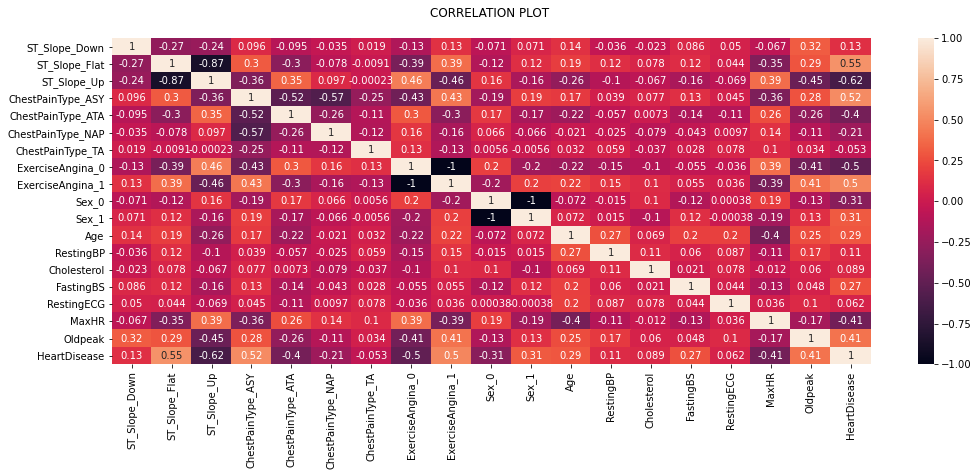

In [3779]:
# Variables and their correlations.

plt.figure(figsize= (17,6))
sns.heatmap(Final_df.corr(),annot=True).set(title='CORRELATION PLOT \n')

#plt.show()

From the correlation plot, strong correlation is seen between ST_Slope_Flat and  Heart Disease,with moderate positive correlation of 0.56. This means that there many patients with ST_Slope_Flat
that have heart disease, inferring that flat ST is likely to cause heart disease.

For ST_Slope_Up, there is a moderate negative correlation with heat disease, which means that less patients with ST_Slope_Up have heart disease and upsloping ST is likely to not cause heart disease.

For chest pain type, chestpaintype_ASY has a moderate positive correlation with heart disease, which means that more patients have this type of chest pain and its likely to cause heart disease.

Chest pain type ATA has a weak negative correlation with heart disease, there are few patients with this type of chest pain and it is likely not to cause heart disease. 

Exercise angina[0] has a moderate negative correlation of -0.5 while Exercise angina[1] has a moderate positive correlation of 0.5.

MaxHR have a weak negative correlation, increase in MaxHR does not lead to heart disease.

Old peak shows a weak positive correlation, increase in oldpeak slightly increases the chances of heart disease.

In [3780]:
# get the columns of the data frame

Final_df.columns

Index(['ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ExerciseAngina_0', 'ExerciseAngina_1', 'Sex_0', 'Sex_1', 'Age',
       'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
       'Oldpeak', 'HeartDisease'],
      dtype='object')

In [3781]:
# Get the columns as a list

Final_df.columns.values.tolist()

['ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'ExerciseAngina_0',
 'ExerciseAngina_1',
 'Sex_0',
 'Sex_1',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

Selecting subsets of the data to be used in the model as the features and the one as target.

In [3782]:
# features are the independent variables and target is the dependent variable.

features  =['ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'ExerciseAngina_0',
 'ExerciseAngina_1',
 'Sex_0',
 'Sex_1',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'Oldpeak']

target = "HeartDisease"

features

['ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'ExerciseAngina_0',
 'ExerciseAngina_1',
 'Sex_0',
 'Sex_1',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'Oldpeak']

In [3783]:
target

'HeartDisease'

In [3784]:
# plot a boxplot for all.

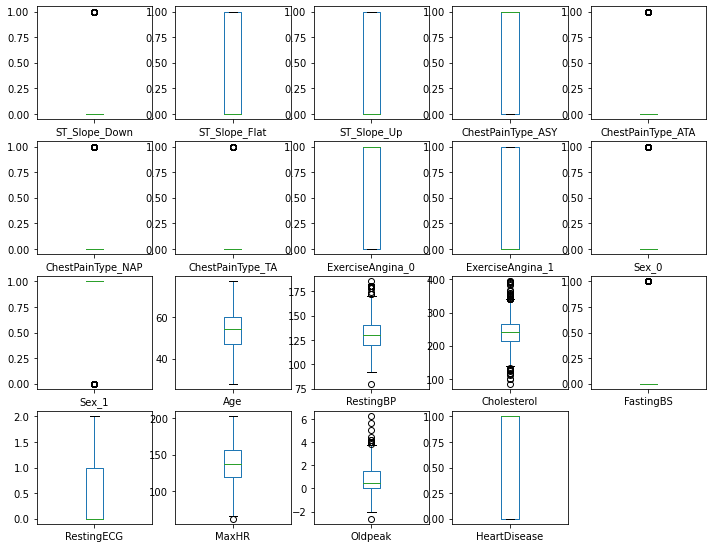

In [3785]:
Final_df.plot(kind="box",subplots =True, layout=(5,5),figsize= (12,12))

plt.show()

### Creating feature and target variables.

In [3786]:
# Assign features as "X" and target as "y"

X = Final_df[features]
y = Final_df[target]
X.shape, y.shape

((896, 18), (896,))

Split the data into training and test data.

In [3787]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}" .format(X_test.shape, y_test.shape))

Train dataset: (716, 18)(716,)
Test dataset: (180, 18)(180,)


In [3788]:
X_train

,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak
841,0,1,0,0,0,1,0,1,0,1,0,62,130,263,0,0,97,1.2
45,0,1,0,0,0,1,0,0,1,0,1,59,130,318,0,0,120,1.0
279,0,0,1,0,1,0,0,1,0,1,0,54,130,253,0,1,155,0.0
555,0,1,0,0,0,1,0,0,1,0,1,58,150,219,0,1,118,0.0
743,0,0,1,0,1,0,0,1,0,0,1,52,134,201,0,0,158,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1,0,1,0,0,0,0,1,0,1,63,150,241,0,0,86,2.0
367,0,0,1,1,0,0,0,0,1,0,1,68,135,241,0,1,120,0.0
834,0,0,1,0,1,0,0,1,0,0,1,44,120,220,0,0,170,0.0
138,0,1,0,1,0,0,0,0,1,0,1,54,140,166,0,0,118,0.0


Normalization

In [3789]:
from sklearn.preprocessing import MinMaxScaler

In [3790]:
# normalize X_train

scaler = MinMaxScaler()
X_train[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]] = scaler.fit_transform(X_train[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]])
X_train.head()




,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak
841,0,1,0,0,0,1,0,1,0,1,0,0.693878,0.408602,0.554422,0,0,0.244604,0.350649
45,0,1,0,0,0,1,0,0,1,0,1,0.632653,0.408602,0.741497,0,0,0.410072,0.324675
279,0,0,1,0,1,0,0,1,0,1,0,0.530612,0.408602,0.520408,0,1,0.661871,0.194805
555,0,1,0,0,0,1,0,0,1,0,1,0.612245,0.623656,0.404762,0,1,0.395683,0.194805
743,0,0,1,0,1,0,0,1,0,0,1,0.489796,0.451613,0.343537,0,0,0.683453,0.298701


In [3791]:
# normalize x_test

X_test[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]] = scaler.transform(X_test[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]])
X_test.head()

,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_0,ExerciseAngina_1,Sex_0,Sex_1,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak
843,0,0,1,0,0,0,1,1,0,1,0,0.612245,0.623656,0.622449,1,2,0.712230,0.324675
816,0,0,1,1,0,0,0,1,0,0,1,0.612245,0.354839,0.680272,0,2,0.776978,0.194805
893,0,0,1,0,1,0,0,1,0,0,1,0.591837,0.666667,0.448980,0,2,0.726619,0.194805
244,0,1,0,1,0,0,0,0,1,0,1,0.408163,0.731183,0.571429,0,0,0.287770,0.324675
490,0,1,0,0,0,1,0,0,1,0,1,0.897959,0.301075,0.387755,0,0,0.280576,0.324675


# MODELLING

# Using Logistic regression

In [3792]:
# Logistic regression(classification)

LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred1))



Accuracy: 0.8611111111111112


### EVALUATION

In [3793]:
# evaluation of the logistic regression model

confmat= confusion_matrix(y_test, y_pred1)
print(confmat)

[[65 14]
 [11 90]]


In [3794]:
# report of the evaluation with the f1-score

report = classification_report(y_test,y_pred1)

print(report)

print

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        79
           1       0.87      0.89      0.88       101

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



<function print>

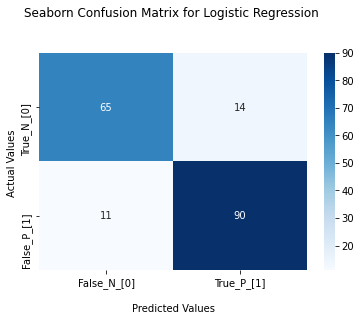

In [3795]:
# seaborn heatmap confusion matrix

ax = sns.heatmap(confmat, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Logistic Regression \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False_N_[0]','True_P_[1]'])
ax.yaxis.set_ticklabels(['True_N_[0]','False_P_[1]'])

## Display the visualization of the Confusion Matrix.
plt.show()

## USING K NEAREST NEIGHBOURS (KNN)

In [3796]:
from sklearn.neighbors import KNeighborsClassifier


In [3797]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)
y_pred2 = KNN.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred2))

# evaluation

cf_matrix =(confusion_matrix(y_test, y_pred2))

print(cf_matrix)
rep = classification_report(y_test, y_pred2)
print(rep)

print(y_pred2)

Accuracy: 0.8444444444444444
[[61 18]
 [10 91]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        79
           1       0.83      0.90      0.87       101

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180

[0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1]


Plotting

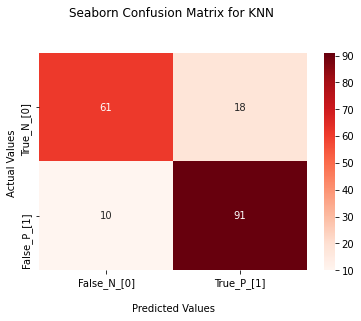

In [3798]:
# seaborn heatmap confusion matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix for KNN \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order

ax.xaxis.set_ticklabels(['False_N_[0]','True_P_[1]'])
ax.yaxis.set_ticklabels(['True_N_[0]','False_P_[1]'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Using Support Vector Machines(SVM)

In [3799]:
from sklearn import svm

In [3800]:
SVM = svm.SVC()

SVM.fit(X_train, y_train)
y_pred3 = SVM.predict(X_test)

accu = accuracy_score(y_test,y_pred3)
print ("Accuracy =", accu)

# evaluation

conf_matrix =(confusion_matrix(y_test, y_pred3))
print(conf_matrix)
rep = classification_report(y_test, y_pred3)
print(rep)

Accuracy = 0.85
[[61 18]
 [ 9 92]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        79
           1       0.84      0.91      0.87       101

    accuracy                           0.85       180
   macro avg       0.85      0.84      0.85       180
weighted avg       0.85      0.85      0.85       180



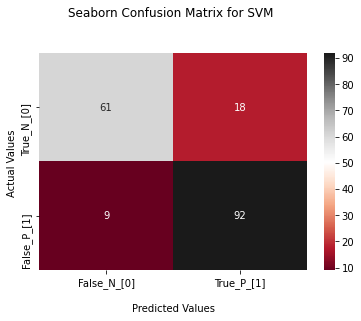

In [3801]:
# seaborn heatmap confusion matrix

ax = sns.heatmap(conf_matrix, annot=True, cmap='RdGy')

ax.set_title('Seaborn Confusion Matrix for SVM \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False_N_[0]','True_P_[1]'])
ax.yaxis.set_ticklabels(['True_N_[0]','False_P_[1]'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Using Random Forest

In [3802]:
RF = RandomForestClassifier(n_estimators=100)

RF.fit(X_train, y_train)
y_pred4 = RF.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred4))

# evaluation

cnf_matrix =(confusion_matrix(y_test, y_pred4))
print(cnf_matrix)
rep = classification_report(y_test, y_pred4)
print(rep)

Accuracy: 0.8666666666666667
[[64 15]
 [ 9 92]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        79
           1       0.86      0.91      0.88       101

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180



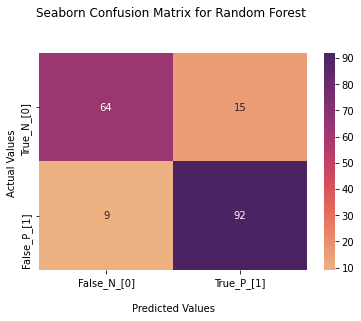

In [3803]:
# seaborn heatmap confusion matrix

ax = sns.heatmap(cnf_matrix, annot=True, cmap='flare')

ax.set_title('Seaborn Confusion Matrix for Random Forest \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False_N_[0]','True_P_[1]'])
ax.yaxis.set_ticklabels(['True_N_[0]','False_P_[1]'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Using Decision Tree

In [3804]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred5 =DT.predict(X_test)

accur = accuracy_score(y_test,y_pred5)
print ("Accuracy=", accur)


# evaluation

conf_matrix =(confusion_matrix(y_test, y_pred5))
print(conf_matrix)
report = classification_report(y_test, y_pred5)
print(report)


Accuracy= 0.8
[[63 16]
 [20 81]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        79
           1       0.84      0.80      0.82       101

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180



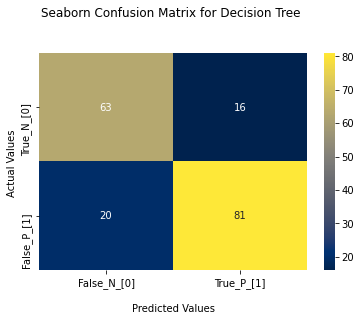

In [3805]:
# seaborn heatmap confusion matrix

ax = sns.heatmap(conf_matrix, annot=True, cmap='cividis')

ax.set_title('Seaborn Confusion Matrix for Decision Tree \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False_N_[0]','True_P_[1]'])
ax.yaxis.set_ticklabels(['True_N_[0]','False_P_[1]'])


## Display the visualization of the Confusion Matrix.
plt.show()

# Using Naive Bayes

In [3806]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

NB.fit(X_train,y_train)

y_pred6 =NB.predict(X_test)

accur = accuracy_score(y_test,y_pred6)
print ("Accuracy=", accur)


# evaluation

confu_matrix =(confusion_matrix(y_test, y_pred6))
print(confu_matrix)
report = classification_report(y_test, y_pred6)
print(report)

Accuracy= 0.85
[[63 16]
 [11 90]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        79
           1       0.85      0.89      0.87       101

    accuracy                           0.85       180
   macro avg       0.85      0.84      0.85       180
weighted avg       0.85      0.85      0.85       180



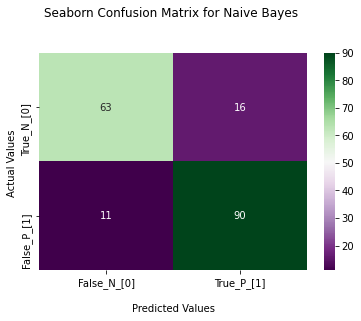

In [3807]:
# seaborn heatmap confusion matrix

ax = sns.heatmap(confu_matrix, annot=True, cmap='PRGn')

ax.set_title('Seaborn Confusion Matrix for Naive Bayes \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False_N_[0]','True_P_[1]'])
ax.yaxis.set_ticklabels(['True_N_[0]','False_P_[1]'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [3808]:
Models = pd.DataFrame({"Models":["LR","KNN","SVM","RF","DT","NB"],
                       "Accuracy":[accuracy_score(y_test,y_pred1),
                                   accuracy_score(y_test,y_pred2),
                                   accuracy_score(y_test,y_pred3),
                                   accuracy_score(y_test,y_pred4),
                                   accuracy_score(y_test,y_pred5),
                                   accuracy_score(y_test,y_pred6)]})
                       
Models

,Models,Accuracy
0,LR,0.861111
1,KNN,0.844444
2,SVM,0.850000
3,RF,0.866667
4,DT,0.800000
5,NB,0.850000


From the 6 models, random forest has the highest accuracy of 0.872 compared to the other models.This model is the preferred model for the prediction.
87 percent of the data were correctly predicted.